<a href="https://colab.research.google.com/github/gpappetti/famaFrench/blob/main/HRP_DOMBOSCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install riskfolio-lib

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr  4 13:57:56 2023

@author: gustavopappetti
"""
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [25]:
data = yf.download(["B3SA3.SA",
                   "ENGI11.SA",
                   "CXSE3.SA",
                   "TOTS3.SA",
                   "RENT3.SA",
                   "EQTL3.SA",
                   "ITUB4.SA",
                   "RADL3.SA",
                   "MULT3.SA",
                   "ELET3.SA",
                   "VIVT3.SA",
                   "BBAS3.SA",
                  #  "ALPK3.SA",
                   "WEGE3.SA",
                   "FLRY3.SA",
                   "ITUB4.SA",
                   "LREN3.SA",
                   "PETR4.SA",
                   "VALE3.SA"], start ="2019-01-02", end ="2023-04-03")

returns = pd.DataFrame.pct_change(data["Adj Close"]).dropna()

[*********************100%***********************]  17 of 17 completed


In [26]:
returns = pd.DataFrame.pct_change(data["Adj Close"]).dropna()

array([[<Axes: title={'center': 'B3SA3.SA'}>,
        <Axes: title={'center': 'BBAS3.SA'}>,
        <Axes: title={'center': 'CXSE3.SA'}>,
        <Axes: title={'center': 'ELET3.SA'}>],
       [<Axes: title={'center': 'ENGI11.SA'}>,
        <Axes: title={'center': 'EQTL3.SA'}>,
        <Axes: title={'center': 'FLRY3.SA'}>,
        <Axes: title={'center': 'ITUB4.SA'}>],
       [<Axes: title={'center': 'LREN3.SA'}>,
        <Axes: title={'center': 'MULT3.SA'}>,
        <Axes: title={'center': 'PETR4.SA'}>,
        <Axes: title={'center': 'RADL3.SA'}>],
       [<Axes: title={'center': 'RENT3.SA'}>,
        <Axes: title={'center': 'TOTS3.SA'}>,
        <Axes: title={'center': 'VALE3.SA'}>,
        <Axes: title={'center': 'VIVT3.SA'}>],
       [<Axes: title={'center': 'WEGE3.SA'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

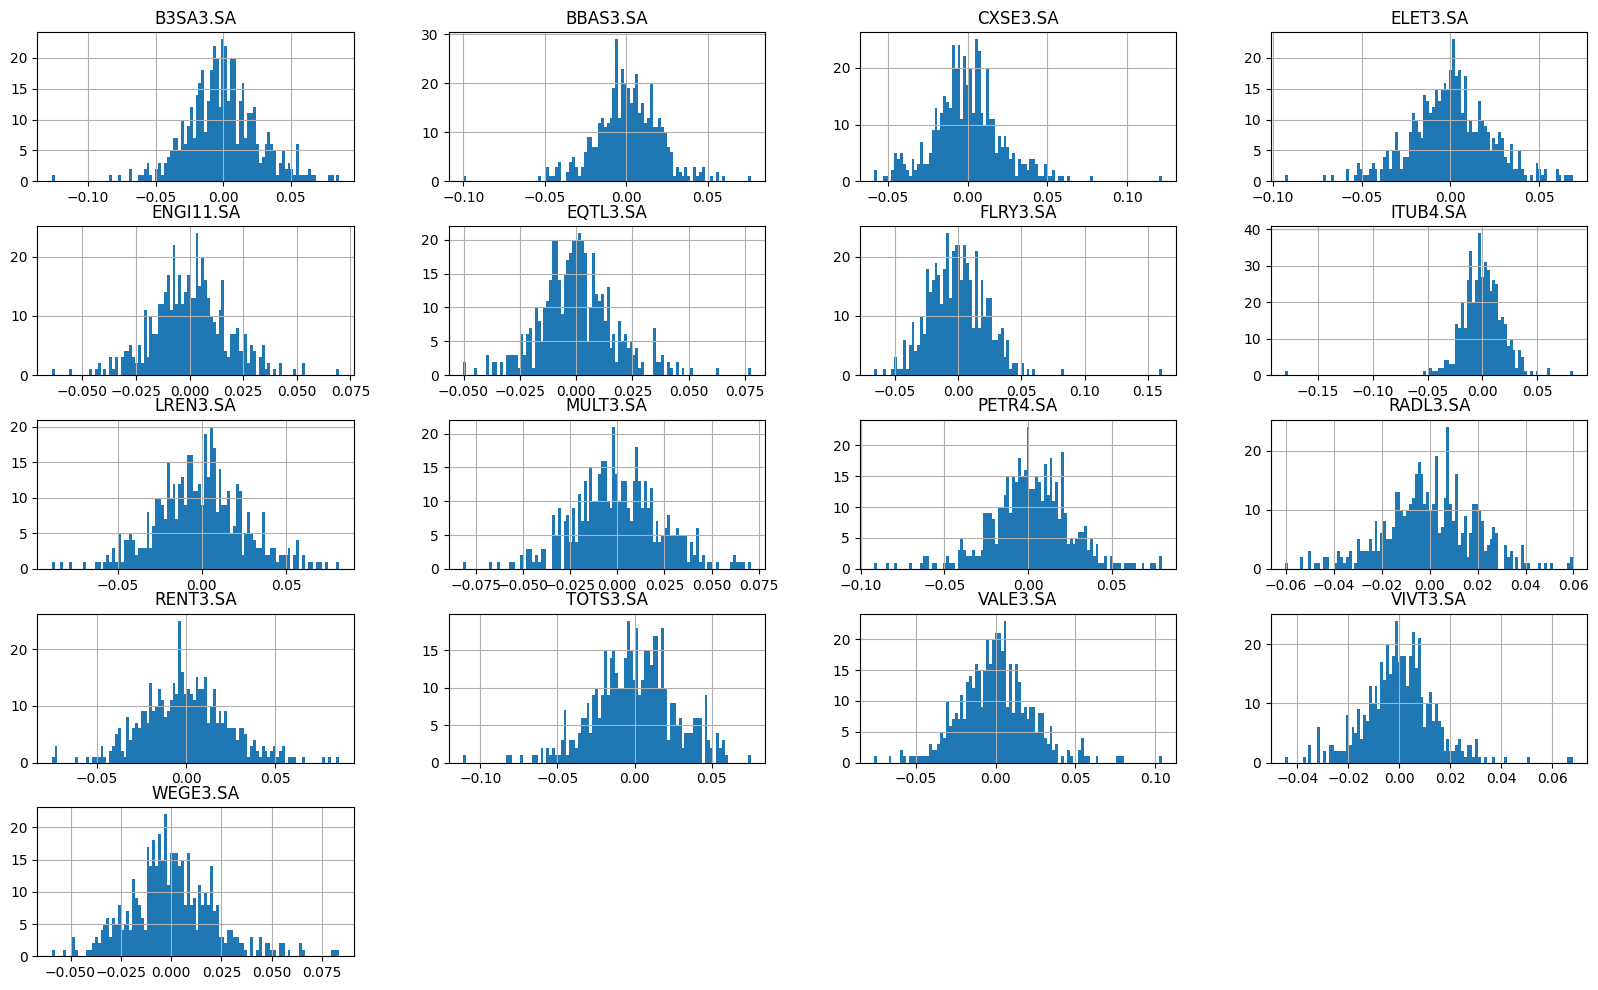

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
 
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(12)
returns.hist(bins=100, ax=ax)

In [28]:
codependence = 'pearson'
linkage = 'single'
t_factor = 252
leaf_order = True
hist = True
max_k = 10

method_mu = returns.mean()
method_cov = returns.cov() # Cálculo da matriz de covariância
model = 'HRP' # Definição do método Hierarquical Risk Parity
rm = 'MV' # Medição do Risco através da variância
obj = 'MaxRet' # A métrica de Risco utilizada para a otimização da carteira foi o sharpe ratio,
               # Mas também pode-se utilizar outras métricas como 'MinRisk' (menor risco, independente do retorno) ou 'MaxRet'
               # (Maior retorno, independente do risco)
rf = 0.0002 # Taxa livre de risco, pode ser inserido aqui o CDI médio do período do backtest
l = 0
alpha = 0.25

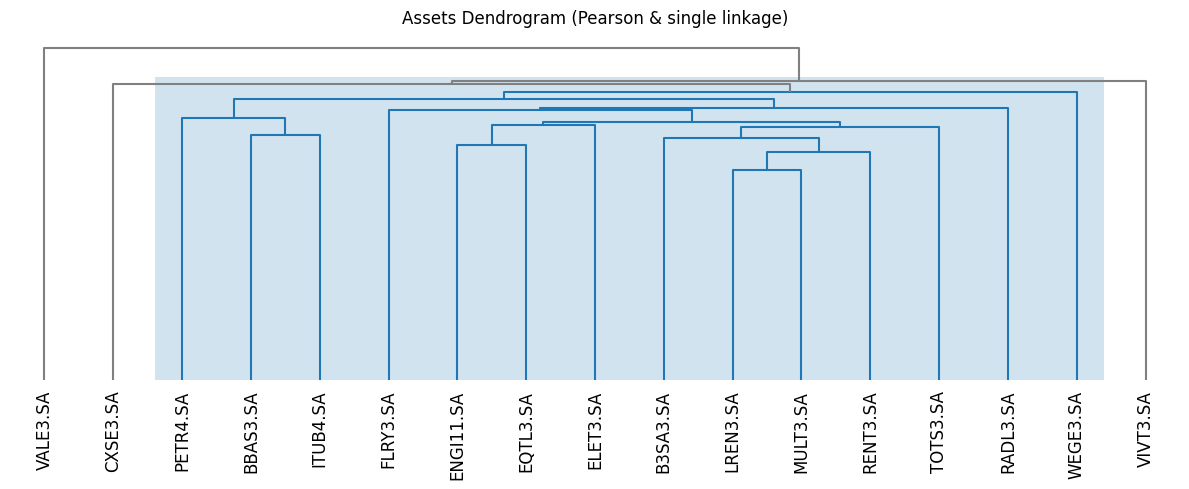

In [29]:
dendograma = rp.plot_dendrogram(returns=returns, codependence=codependence, linkage=linkage, 
                                k= None , max_k=max_k, leaf_order= leaf_order, ax= None )

In [30]:
port = rp.HCPortfolio(returns = returns) 
port.uppermdd = 0.8
port.lowerret = 0.4/365

In [31]:
# port.assets_stats(method_mu = method_mu, method_cov = method_cov)
w = port.optimization(model = model, codependence=codependence, rm = rm, linkage=linkage, obj = obj, rf = rf, l = l, hist = hist, max_k=max_k, leaf_order=leaf_order)

In [32]:
w

,weights
B3SA3.SA,0.029207
BBAS3.SA,0.073672
CXSE3.SA,0.079105
ELET3.SA,0.039605
ENGI11.SA,0.078719
EQTL3.SA,0.084639
FLRY3.SA,0.058706
ITUB4.SA,0.083020
LREN3.SA,0.025670
MULT3.SA,0.033640


In [33]:
rms = ['vol', 'MV', 'MDD', 'MAD', 'MSV', 'FLPM', 'SLPM','VaR','CVaR', 'EVaR', 'WR', 'ADD',
       'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel', 'ADD_Rel', 'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          correlation=codependence,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,MDD,MAD,MSV,FLPM,SLPM,VaR,CVaR,EVaR,WR,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
B3SA3.SA,4.39%,2.92%,4.52%,4.44%,4.34%,4.25%,4.23%,4.39%,4.29%,3.12%,2.40%,3.25%,4.30%,4.49%,4.48%,3.59%,4.44%,3.05%,4.24%,4.39%,4.40%,3.44%
BBAS3.SA,7.03%,7.37%,8.64%,7.08%,6.68%,7.64%,6.98%,6.59%,6.83%,5.45%,4.63%,11.78%,10.14%,9.69%,9.41%,11.37%,8.64%,11.66%,9.91%,9.43%,9.23%,11.23%
CXSE3.SA,7.32%,7.91%,6.53%,7.28%,7.43%,7.31%,7.46%,6.53%,7.62%,9.13%,10.82%,4.14%,5.19%,5.72%,6.07%,4.56%,6.44%,4.09%,5.46%,5.75%,6.02%,4.55%
ELET3.SA,5.11%,3.96%,4.02%,5.16%,4.97%,5.08%,4.93%,4.96%,4.89%,4.05%,3.28%,3.85%,3.92%,4.00%,3.99%,3.89%,4.34%,4.03%,4.35%,4.31%,4.31%,4.15%
ENGI11.SA,7.27%,7.87%,8.56%,7.16%,7.22%,7.13%,7.21%,6.91%,7.01%,8.01%,8.08%,8.32%,8.08%,7.95%,8.12%,8.46%,7.94%,8.38%,7.73%,7.74%,7.80%,8.50%
EQTL3.SA,7.54%,8.46%,11.24%,7.67%,7.82%,7.76%,7.90%,7.51%,7.56%,9.30%,10.34%,10.37%,10.67%,10.72%,10.83%,10.51%,10.38%,10.50%,10.02%,10.12%,10.18%,10.50%
FLRY3.SA,6.27%,5.87%,4.17%,6.04%,6.62%,5.66%,6.35%,5.87%,6.91%,9.58%,11.51%,2.40%,3.68%,3.79%,3.90%,2.72%,4.53%,2.69%,3.87%,4.09%,4.22%,2.96%
ITUB4.SA,7.46%,8.30%,6.03%,7.71%,7.03%,7.58%,6.97%,8.30%,7.25%,4.47%,4.26%,4.40%,5.42%,5.53%,5.66%,4.77%,5.99%,4.37%,5.41%,5.55%,5.66%,4.72%
LREN3.SA,4.11%,2.57%,2.55%,4.17%,4.16%,3.86%,3.97%,4.05%,4.00%,3.73%,3.09%,1.59%,2.59%,2.59%,2.54%,1.91%,2.91%,1.64%,2.85%,2.86%,2.84%,1.93%
MULT3.SA,4.71%,3.36%,4.31%,4.73%,4.77%,4.78%,4.80%,5.33%,4.73%,4.31%,3.37%,4.21%,4.95%,4.67%,4.44%,4.47%,4.51%,3.67%,4.98%,4.78%,4.60%,4.09%


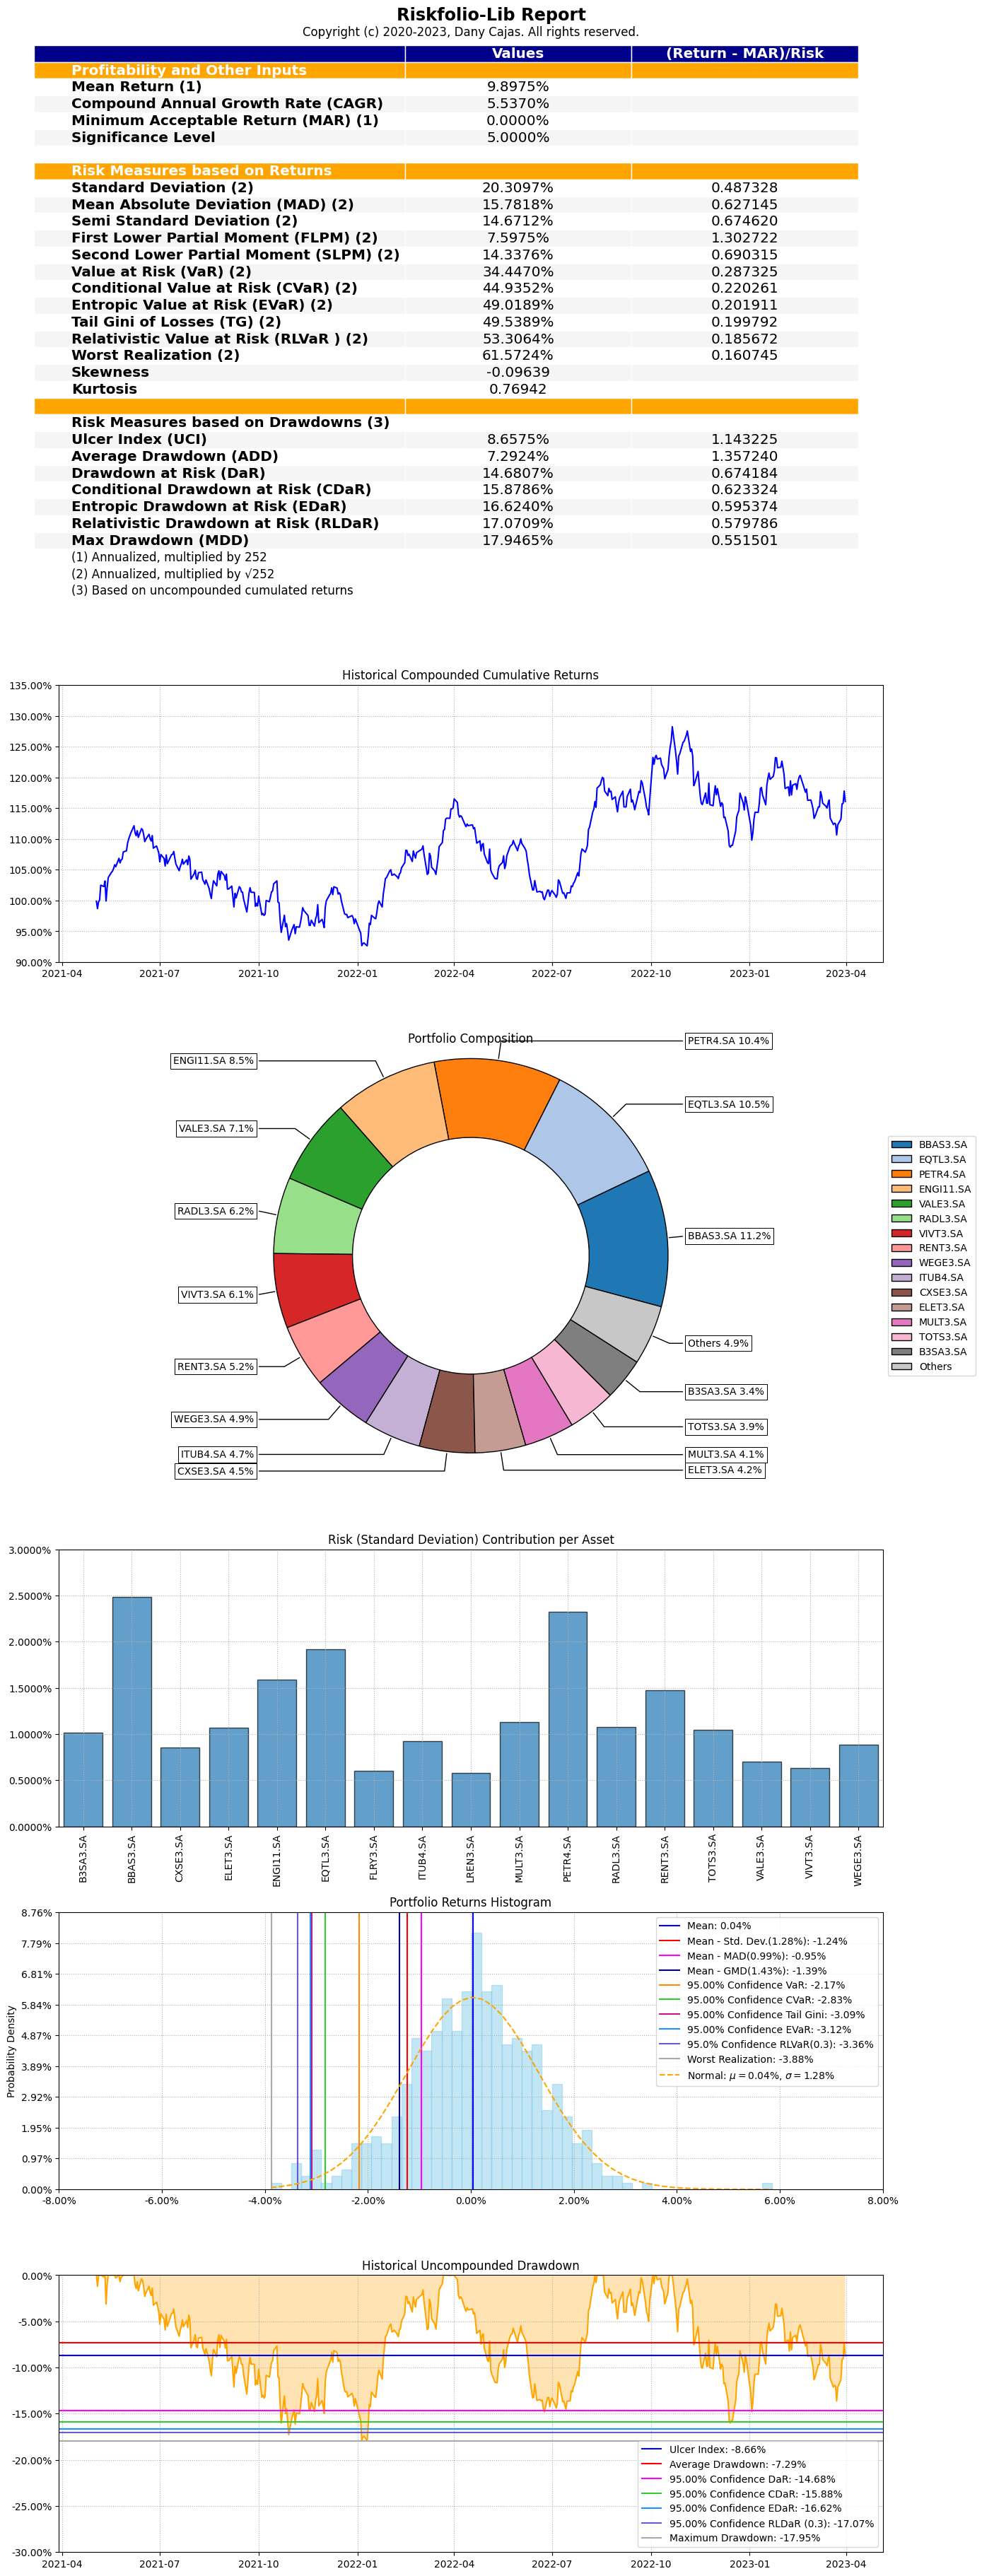

In [34]:
ax = rp.jupyter_report(returns, w, rm = rm)
plt.show()